In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import interpolate

<font size = 3 color = black face = "Times New Roman">Problem 1

<font size = 3 color = black face = "Times New Roman">(1)

In [258]:
def f(x):
    return x + 2 / x

def lagrange(x, i, x_data):
    L = 1
    for j in range(len(x_data)):
        if j != i:
            L = L * (x - x_data[j])/(x_data[i] - x_data[j])
    return L

def lagrange_interpolation(x, x_data, y_data):
    y = 0
    for i in range(len(x_data)):
        y = y + y_data[i] * lagrange(x, i, x_data)
    return y

In [4]:
x_data1 = np.array([1, 2, 2.5])
y_data1 = f(x_data1)
print(f'f(1.2) = {f(1.2)}')
print(f'f(1.5) = {f(1.5)}')
print(f'p(1.2) = {lagrange_interpolation(1.2, x_data1, y_data1)}')
print(f'p(1.5) = {lagrange_interpolation(1.5, x_data1, y_data1)}')

f(1.2) = 2.8666666666666667
f(1.5) = 2.833333333333333
p(1.2) = 2.936
p(1.5) = 2.9000000000000004


<font size = 3 color = black face = "Times New Roman">(2)

In [5]:
x_data2 = np.array([0.5, 1, 2, 2.5])
y_data2 = f(x_data2)
print(f'f(1.2) = {f(1.2)}')
print(f'f(1.5) = {f(1.5)}')
print(f'p(1.2) = {lagrange_interpolation(1.2, x_data2, y_data2)}')
print(f'p(1.5) = {lagrange_interpolation(1.5, x_data2, y_data2)}')

f(1.2) = 2.8666666666666667
f(1.5) = 2.833333333333333
p(1.2) = 2.7696
p(1.5) = 2.7


<font size = 3 color = black face = "Times New Roman">(3)

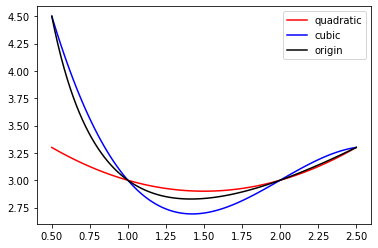

In [269]:
x = np.linspace(0.5, 2.5, 100)
y1 = lagrange_interpolation(x, x_data1, y_data1)
y2 = lagrange_interpolation(x, x_data2, y_data2)
y = f(x)
plt.plot(x, y1, color = 'r',label = 'quadratic')
plt.plot(x, y2, color = 'b', label = 'cubic')
plt.plot(x, y, color = 'black', label = 'origin')
plt.legend(loc=0,ncol=1)

<font size = 3 color = black face = "Times New Roman">We can see that when $x<1$, the cubic line is better, and when $x>1$, the quadratic line is better. I think this is because the $x$ is little, the cubic term is dominant while the quadratic term is dominant when $x$ is big. So if we use the quedratic line to get $p(1.2)$ and $p(1.5)$, the quadratic line is better, this is in line with our solution previous.

<font size = 3 color = black face = "Times New Roman">Problem 4

In [227]:
import scipy.special
import matplotlib.pyplot as plt

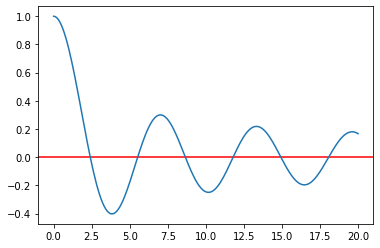

In [228]:
x = np.linspace(0,20,200)
y = scipy.special.jv(0, x)
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(x,y)

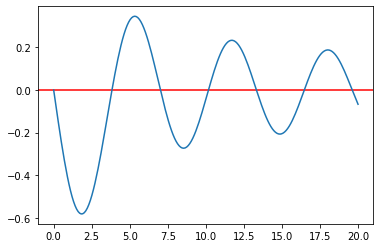

In [229]:
x = np.linspace(0,20,200)
y_derivative = scipy.special.jv(-1, x)/2 - scipy.special.jv(1, x)/2
plt.axhline(y=0, color='r', linestyle='-')
plt.plot(x,y_derivative)

In [230]:
def f(x):
    return scipy.special.jv(-1, x)/2 - scipy.special.jv(1, x)/2

def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    f_R = f(x_R)
    x_M = (x_L + x_R) / 2.0
    f_M = f(x_M)
    iteration_counter = 0
    if f_L*f_R > 0:
        print("""Error! Function does not have opposite 
                signs at interval endpoints!""")
    while abs(f_M) > eps: 
        if f_L*f_M < 0:
            x_R = x_M
            f_R = f_M
        else:
            x_L = x_M
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1
    return x_M

In [237]:
root1 = bisection(f, 2.5, 5, 1e-3)
root2 = bisection(f, 6, 7.5, 1e-3)
root3 = bisection(f, 10, 11, 1e-3)
root7 = bisection(f, 18, 21, 1e-3)
print(root1, root2, root3, root7)

3.8330078125 7.013671875 10.171875 19.6171875


<font size = 3 color = black face = "Times New Roman">Here I use the natural condition in the religion[0,19.62] to solve this problem.

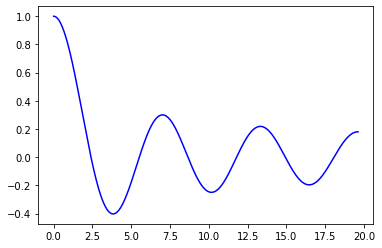

In [255]:
x_data = np.linspace(0, 19.62, 1000)
y_data = scipy.special.jv(0, x_data)
cs = scipy.interpolate.CubicSpline(x_data, y_data, bc_type='natural')
plt.plot(x_data, cs(x_data),color = 'b')

cs(3.4) = -0.3642955967382088
J0(3.4) = -0.3642955967620004


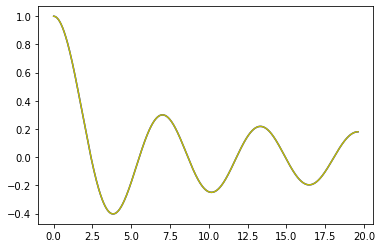

In [256]:
print(f'cs(3.4) = {cs(3.4)}')
print(f'J0(3.4) = {scipy.special.jv(0, 3.4)}')
plt.plot(x_data, cs(x_data),color = 'b') #a blue line to express the cubic spline
plt.plot(x_data,scipy.special.jv(0, x_data), color = 'y') #a yellow line to express the origin line 

<font size = 3 color = black face = "Times New Roman">We can find that the value is very close, and the two line is almost overlapped. It proves we get a nice cubic spline.

<font size = 3 color = black face = "Times New Roman">Problem 6

<font size = 3 color = black face = "Times New Roman">(1)

In [215]:
import numpy as np
import matplotlib.pyplot as plt

In [216]:
x_data = np.array([25*i for i in range(9)])
y_data = np.array([10.6, 16., 45., 83.5, 52.8, 19.9, 10.8, 8.25, 4.70])
error = np.array([9.34, 17.9, 41.5, 85.5, 51.5, 21.5, 10.8, 6.29, 4.14])

<font size = 3 color = black face = "Times New Roman">The first method is to take the inverse of both sides of the equation and do the least square fitting of quadratic polynomials. Here we use the inner function numpy.polyfit to solve this problem. But why don't we use $Aa = S$ to get the coefficients? I will explain it first.

In [217]:
A = np.array([[9, x_data.sum(), (x_data**2).sum()],
              [x_data.sum(), (x_data**2).sum(), (x_data**3).sum()],
              [(x_data**2).sum(), (x_data**3).sum(), (x_data**4).sum()]])
print(A)

[[         9        900     127500]
 [       900     127500   20250000]
 [    127500   20250000 -868404796]]


<font size = 3 color = black face = "Times New Roman">We can see that $A_{33}$ is a minus number, that's because it is out of the range of int type number. Large number is easy to produce error and difficult to calculate. So I choose the inner function.

In [218]:
y_inv = 1 / y_data
coeff = np.polyfit(x_data, y_inv, 2)
print(coeff)

def func_inv(x):
    return coeff[0]*x**2 + coeff[1]*x + coeff[2]

def func(x):
    return 1 / func_inv(x)

[ 1.30385637e-05 -2.05514097e-03  9.71121351e-02]


Text(0, 0.5, 'f-inv')

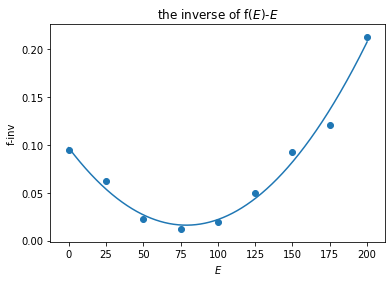

In [219]:
x = np.linspace(0,200,10000)
f_inv = func_inv(x)
f_Ek = func(x)
plt.plot(x, f_inv)
plt.scatter(x_data, y_inv)
plt.title('the inverse of f($E$)-$E$')
plt.xlabel('$E$')
plt.ylabel('f-inv')

<font size = 3 color = black face = "Times New Roman">We get a beautiful image. It proves that our fitting maybe right. But later we will see there is something wrong.

Text(0.5, 1.0, 'f($E$)-$E$')

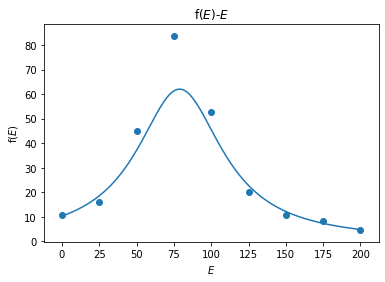

In [220]:
x = np.linspace(0,200,10000)
plt.plot(x, f_Ek)
plt.scatter(x_data, y_data)
plt.xlabel('$E$')
plt.ylabel('f($E$)')
plt.title('f($E$)-$E$')

<font size = 3 color = black face = "Times New Roman">This image is so bad... I think the reason is that we use the inverse, so a little error in the inverse of $f(E_k)$ causes a big error of $f(E_k)$. But the numpy.polyfit can't give us a calculation with error. So we use another great inner function, that's scipy.optimize.curve_fit.

<font size = 3 color = black face = "Times New Roman">To use this inner function, we should pass a model function to it, here I use fuc() to express it.

In [221]:
from scipy.optimize import curve_fit

<font size = 3 color = black face = "Times New Roman">If we don't use the error, we will get:

[66886.39690237    77.493579     788.88396468]
fr = 66886.39690236824
Er = 77.49357900310838
tau = 56.17415650207324
f(10) = 12.515541375102886
f(90) = 70.75720288315277
f(185) = 5.417431518240662


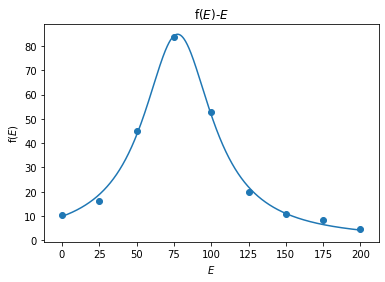

In [222]:
def func(x, fr, Er, tau_2_quater):
    return fr / ((x-Er)**2+tau_2_quater)

coeff, a = scipy.optimize.curve_fit(func, x_data, y_data, p0 = None, sigma = None, absolute_sigma = False)
print(coeff)
x = np.linspace(0,200,10000)
f = func(x, coeff[0], coeff[1], coeff[2])
plt.plot(x, f)
plt.scatter(x_data, y_data)
plt.xlabel('$E$')
plt.ylabel('f($E$)')
plt.title('f($E$)-$E$')
fr = coeff[0]
Er = coeff[1]
tau = 2*np.sqrt(coeff[2])
print('fr =' %f, coeff[0])
print('Er =' %f, coeff[1])
print('tau =' %f, tau)
print('f(10) =' %f, func(10, coeff[0], coeff[1], coeff[2]))
print('f(90) =' %f, func(90, coeff[0], coeff[1], coeff[2]))
print('f(185) =' %f, func(185, coeff[0], coeff[1], coeff[2]))

<font size = 3 color = black face = "Times New Roman">This image is beautiful. We get $fr = 66886$, $Er = 77.5$, $\tau = 56$ and $f(10) = 12.515541375102886$, $f(90) = 70.75720288315277$, $f(185) = 5.417431518240662$. The results are very close. 

[70878.20145835    78.18754675   875.2343264 ]
fr = 70878.20145835192
Er = 78.18754675106341
tau = 59.1687189789653
f(10) = 12.829154209300112
f(90) = 69.84667928535787
f(185) = 5.769897869854146


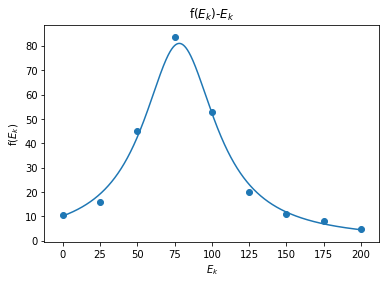

In [223]:
def func(x, fr, Er, tau_2_quater):
    return fr / ((x-Er)**2+tau_2_quater)

coeff, a = scipy.optimize.curve_fit(func, x_data, y_data, p0 = None, sigma = error, absolute_sigma= True)
print(coeff)
x = np.linspace(0,200,10000)
f = func(x, coeff[0], coeff[1], coeff[2])
plt.plot(x, f)
plt.scatter(x_data, y_data)
plt.xlabel('$E_k$')
plt.ylabel('f($E_k$)')
plt.title('f($E_k$)-$E_k$')
fr = coeff[0]
Er = coeff[1]
tau = 2*np.sqrt(coeff[2])
print('fr =' %f, coeff[0])
print('Er =' %f, coeff[1])
print('tau =' %f, tau)
print('f(10) =' %f, func(10, coeff[0], coeff[1], coeff[2]))
print('f(90) =' %f, func(90, coeff[0], coeff[1], coeff[2]))
print('f(185) =' %f, func(185, coeff[0], coeff[1], coeff[2]))

<font size = 3 color = black face = "Times New Roman">We get $fr = 70878$, $Er = 78$, $\tau = 59$ and $f(10) = 12.829154209300112$, $f(90) = 69.84667928535787$, $f(185) = 5.769897869854146$.

<font size = 3 color = black face = "Times New Roman">During my exploration, I use the first method but fit it with scipy.optimize.curve_fit(), I find that no matter I use the error or not, there is always big error when the function value is big. So I think the first method -- quadratic nonlinear fit is not an ideal method for this problem.

<font size = 3 color = black face = "Times New Roman">(2)

<font size = 3 color = black face = "Times New Roman">Easy to calculate that the second derivative of the function is not 0 and this funtion is not period, so we can just use the clamped condition. One easy way to realize cubic spline is to use the inner function scipy.interpolate.CubicSpline()

Text(0.5, 1.0, 'f($E_k$)-$E_k$')

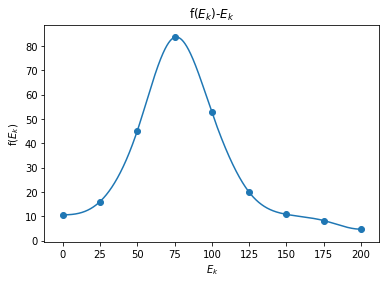

In [224]:
cs = scipy.interpolate.CubicSpline(x_data, y_data, bc_type='clamped')
x = np.linspace(0,200,10000)
plt.plot(x,cs(x))
plt.scatter(x_data, y_data)
plt.xlabel('$E_k$')
plt.ylabel('f($E_k$)')
plt.title('f($E_k$)-$E_k$')

In [225]:
print(f'f(10) = {cs(10)}')
print(f'f(90) = {cs(90)}')
print(f'f(185) = {cs(185)}')

f(10) = 11.119897790868931
f(90) = 70.48531870397643
f(185) = 6.44349617083947


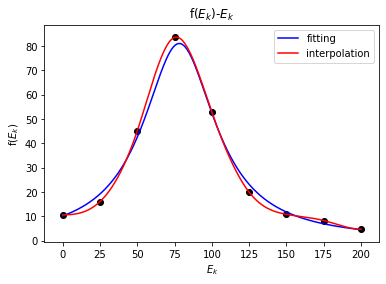

In [226]:
plt.plot(x, f,color = 'b',label ='fitting')
plt.plot(x,cs(x),color='r',label ='interpolation')
plt.scatter(x_data, y_data,color = 'black')
plt.xlabel('$E_k$')
plt.ylabel('f($E_k$)')
plt.title('f($E_k$)-$E_k$')
plt.legend(loc=0,ncol=1)

<font size = 3 color = black face = "Times New Roman">From the result, we can find that when $f(E_k)$ is big, the difference is little. But when the function value is little, the difference is obvious. From $E_k$ in the religion 125~200, I think the fitting is better as it seems more like the inverse of a quadratic function.

--------

以下是没有写对的cubic spline

In [149]:
q = -2 * fr * (x_data[-1] - Er)/((x_data[-1] - Er)**2 + tau**2/4)**2
p = -2 * fr * (x_data[0] - Er)/((x_data[0] - Er)**2 + tau**2/4)**2

In [181]:
d = y_data
s = np.ones([9, 1])
for i in range(9):
    if i == 0:
        s[i] = 3*(d[1] - d[0])/25 - 3*p
    elif i == 8:
        s[i] = 3*q - 3*(d[-1] - d[-2])/25
    else:
        s[i] = 3*(d[i+1] - d[i])/25 - 3*(d[i] - d[i-1])/25
A = 100*np.eye(9,k=0) + 25*np.eye(9,k=1) + 25*np.eye(9,k=-1)
A[0][0] = A[-1][-1] = 50
print(A)
s

[[ 50.  25.   0.   0.   0.   0.   0.   0.   0.]
 [ 25. 100.  25.   0.   0.   0.   0.   0.   0.]
 [  0.  25. 100.  25.   0.   0.   0.   0.   0.]
 [  0.   0.  25. 100.  25.   0.   0.   0.   0.]
 [  0.   0.   0.  25. 100.  25.   0.   0.   0.]
 [  0.   0.   0.   0.  25. 100.  25.   0.   0.]
 [  0.   0.   0.   0.   0.  25. 100.  25.   0.]
 [  0.   0.   0.   0.   0.   0.  25. 100.  25.]
 [  0.   0.   0.   0.   0.   0.   0.  25.  50.]]


array([[-0.03281679],
       [ 2.832     ],
       [ 1.14      ],
       [-8.304     ],
       [-0.264     ],
       [ 2.856     ],
       [ 0.786     ],
       [-0.12      ],
       [ 0.21619815]])

In [182]:
b = scipy.linalg.solve(A, s)
a = np.zeros(8)
c = np.zeros(8)
for i in range(8):
    a[i] = (b[i+1][0] - b[i][0]) / 75
    c[i] = (d[i+1] - d[i]) / 25 - (2*b[i][0] + b[i+1][0]) / 75
print(a)
print(c)

[ 4.95221096e-04  5.97412871e-05 -1.63658624e-03  1.44980369e-03
  1.25371486e-04 -2.87289634e-04 -8.02129504e-05  1.24941435e-04]
[ 0.2160175   1.15896732  1.54048442 -1.22569221 -1.31671719 -0.36468064
 -0.10202585 -0.14199036]


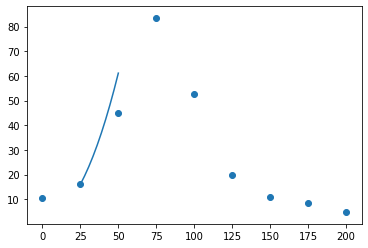

In [183]:
x = np.linspace(25, 50, 10)
y = a[1]*(x - x_data[1])**3 + b[1]*(x - x_data[1])**2 + c[1]*(x - x_data[1]) + d[1]
plt.plot(x,y)
plt.scatter(x_data, y_data)